In [18]:
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

vq_weights = np.load(f"../f4_vq_weights.npy")
print(vq_weights.shape)
case_name = "E4055"
vis_factor = 4 # vq_embeddings are from - vis_factor to vis_factor
save_folder = "../E4055_emb_vis/"
os.makedirs(save_folder, exist_ok=True)

mask_path = f"../mask_body_contour_{case_name}.nii.gz"
mask_file = nib.load(mask_path)
mask_data = mask_file.get_fdata()
mask_binary = mask_data > 0
len_z = mask_binary.shape[2]
len_factor = 4
if len_z % len_factor != 0:
    # pad it to the nearest multiple of 4 at the end
    print(f"Padding the z-axis to the nearest multiple of {len_factor}")
    pad_len = len_factor - len_z % len_factor
    mask_binary = np.pad(mask_binary, ((0, 0), (0, 0), (0, pad_len)), mode="constant", constant_values=0)

print(mask_binary.shape)

(8192, 3)
Padding the z-axis to the nearest multiple of 4
(256, 256, 468)


In [19]:
for anatomical_plane in ["axial", "coronal", "sagittal"]:

    if anatomical_plane == "axial":
        anatomical_zoom_factor = (1/4, 1/4, 1)
        anatomical_mask = zoom(mask_binary, anatomical_zoom_factor, order=0)  # order=1 for bilinear interpolation
        anatomical_mask = np.squeeze(anatomical_mask)
        anatomical_mask = np.transpose(anatomical_mask, (2, 0, 1))
    elif anatomical_plane == "coronal":
        anatomical_zoom_factor = (1/4, 1, 1/4)
        anatomical_mask = zoom(mask_binary, anatomical_zoom_factor, order=0)  # order=1 for bilinear interpolation
        anatomical_mask = np.squeeze(anatomical_mask)
        anatomical_mask = np.transpose(anatomical_mask, (1, 2, 0))
    elif anatomical_plane == "sagittal":
        anatomical_zoom_factor = (1, 1/4, 1/4)
        anatomical_mask = zoom(mask_binary, anatomical_zoom_factor, order=0)  # order=1 for bilinear interpolation
        anatomical_mask = np.squeeze(anatomical_mask)
        anatomical_mask = np.transpose(anatomical_mask, (0, 2, 1))

    print(anatomical_plane, anatomical_mask.shape)

    path_x = f"../James_data_v3/index/{case_name}_x_{anatomical_plane}_ind.npy"
    path_y = f"../James_data_v3/index/{case_name}_y_{anatomical_plane}_ind.npy"

    ind_data_x = np.load(path_x)
    ind_data_y = np.load(path_y)

    len_z, len_x_len_y = ind_data_x.shape
    len_y = 64
    len_x = int(len_x_len_y // len_y)

    # z_list = [10, 20, 30, 40, 50]

    # for idx_z in z_list:
    for idx_z in range(len_z):

        slice_x = ind_data_x[idx_z].reshape(len_x, len_y)
        slice_y = ind_data_y[idx_z].reshape(len_x, len_y)

        slice_x = vq_weights[slice_x]
        slice_y = vq_weights[slice_y]

        slice_x = slice_x / (vis_factor * 2) + 0.5
        slice_y = slice_y / (vis_factor * 2) + 0.5

        slice_mask = anatomical_mask[idx_z, :, :] 

        slice_x = np.rot90(slice_x)
        slice_y = np.rot90(slice_y)
        slice_mask = np.rot90(slice_mask)

        print(anatomical_plane, slice_x.shape, slice_y.shape)

        plt.figure(figsize=(9, 3), dpi=300)
        plt.subplot(1, 3, 1)
        plt.imshow(slice_x)
        plt.title(f"{case_name} TOFNAC {anatomical_plane} slice {idx_z}")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(slice_y)
        plt.title(f"{case_name} CTAC {anatomical_plane} slice {idx_z}")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(slice_mask, cmap="gray")
        plt.title(f"{case_name} {anatomical_plane} slice {idx_z}")
        plt.axis("off")

        savename = save_folder+f"f4_vq_weights_{case_name}_{anatomical_plane}_{idx_z}.png"
        plt.savefig(savename)
        plt.close()


axial (468, 64, 64)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (64, 64, 3)
axial (64, 64, 3) (6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.013465345..0.9137144].


coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 117, 3) (64, 117, 3)
coronal (64, 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.1961563..3.5084696].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.786032..3.8707824].


(256, 7488)
(256, 7488)
256 117 64


(-0.5, 63.5, 116.5, -0.5)

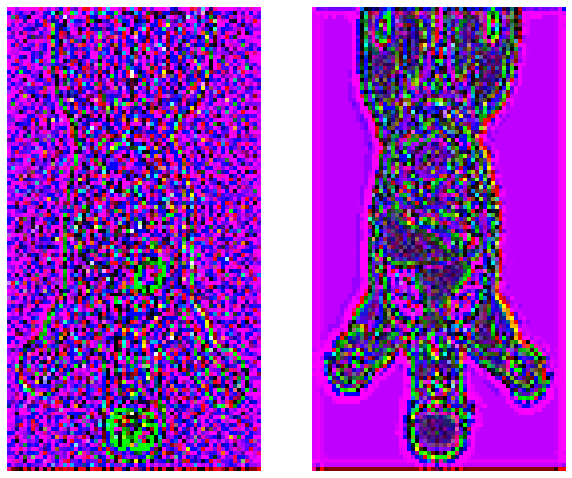

In [29]:
# for coronal

path_x_coronal = f"../James_data_v3/index/{case_name}_x_coronal_ind.npy"
path_y_coronal = f"../James_data_v3/index/{case_name}_y_coronal_ind.npy"
        
file_x_coronal = np.load(path_x_coronal)
file_y_coronal = np.load(path_y_coronal)
print(file_x_coronal.shape)
print(file_y_coronal.shape)
len_z = file_x_coronal.shape[0]
len_x_len_y = file_x_coronal.shape[1]
len_y = 64
len_x = int(len_x_len_y // len_y)
print(len_z, len_x, len_y)


idx_z = len_z // 2

plt.figure(figsize=(10, 10), dpi=72)
plt.subplot(1, 2, 1)
img = file_x_coronal[idx_z].reshape(len_x, len_y)
img = vq_weights[img]
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 2, 2)
img = file_y_coronal[idx_z].reshape(len_x, len_y)
img = vq_weights[img]
plt.imshow(img)
plt.axis("off")

In [80]:
import nibabel as nib
from scipy.ndimage import binary_fill_holes

case_name = "E4055"

HU_boundary_valid_air = -450
HU_boundary_soft = [-450, 150]
HU_boundary_valid_bone = 150

MAX_CT = 2976
MIN_CT = -1024

MID_PET = 5000
MIQ_PET = 0.9
MAX_PET = 20000
MIN_PET = 0
RANGE_CT = MAX_CT - MIN_CT
RANGE_PET = MAX_PET - MIN_PET

norm_Boundary_valid_air = (HU_boundary_valid_air - MIN_CT) / RANGE_CT
norm_Boundary_soft = [(HU_boundary_soft[0] - MIN_CT) / RANGE_CT, (HU_boundary_soft[1] - MIN_CT) / RANGE_CT]
norm_Boundary_valid_bone = (HU_boundary_valid_bone - MIN_CT) / RANGE_CT

In [81]:
CT_path = f"../James_data_v3/CTACIVV_256_norm/CTACIVV_E4055_norm.nii.gz"
CT_file = nib.load(CT_path)
CT_data = CT_file.get_fdata()


mask_body_contour = CT_data > norm_Boundary_valid_air
for i in range(CT_data.shape[0]):
    mask_body_contour[i] = binary_fill_holes(mask_body_contour[i])

mask_body_contour_nii = nib.Nifti1Image(mask_body_contour, CT_file.affine, CT_file.header)
nib.save(mask_body_contour_nii, f"../mask_body_contour_{case_name}.nii.gz")
print(f"mask_body_contour_{case_name}.nii.gz saved")

mask_air = CT_data < norm_Boundary_valid_air
mask_soft = (CT_data >= norm_Boundary_soft[0]) & (CT_data <= norm_Boundary_soft[1])
mask_bone = CT_data > norm_Boundary_valid_bone

# intersection of mask_body_contour and mask_air
mask_body_air = mask_body_contour & mask_air
mask_body_air_nii = nib.Nifti1Image(mask_body_air, CT_file.affine, CT_file.header)
nib.save(mask_body_air_nii, f"../mask_body_air_{case_name}.nii.gz")

# intersection of mask_body_contour and mask_soft
mask_body_soft = mask_body_contour & mask_soft
mask_body_soft_nii = nib.Nifti1Image(mask_body_soft, CT_file.affine, CT_file.header)
nib.save(mask_body_soft_nii, f"../mask_body_soft_{case_name}.nii.gz")

# intersection of mask_body_contour and mask_bone
mask_body_bone = mask_body_contour & mask_bone
mask_body_bone_nii = nib.Nifti1Image(mask_body_bone, CT_file.affine, CT_file.header)
nib.save(mask_body_bone_nii, f"../mask_body_bone_{case_name}.nii.gz")

mask_body_contour_E4055.nii.gz saved


In [63]:
print(mask_body_contour.dtype)

bool
